In [1]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt; import matplotlib.cm as cm
import os

In [2]:
head = ['mergertime', 'simtime', 'm1', 'm2', 'e', 'Mcl',
        'mergetype', 'tlbform', 'rh', 'vk', 'vesc', 'chi_f',
        's1', 's2', 'Z', 'a', 'genmerge', 'mbh']

data = pd.read_csv(os.path.join('runs', 'mergers_10001.txt'), delimiter='\t', names=head)

# Grab the cluster masses and metallicities and find the unique values
Mcls = data['Mcl'].values
metals = data['Z'].values

Mcluni = np.unique(Mcls); metaluni = np.unique(metals)


data

,mergertime,simtime,m1,m2,e,Mcl,mergetype,tlbform,rh,vk,vesc,chi_f,s1,s2,Z,a,genmerge,mbh
0,3.446561e+11,1.767436e+08,30.591538,26.227865,0.922624,100000.0,ejected,1.331547e+10,290.373225,43.765531,16.700779,0.683230,0.0,0.0,0.000126,2.491357,1,3292.812625
1,4.695923e+08,2.940608e+08,38.775044,31.841730,0.999691,100000.0,incluster_inspiral,1.331547e+10,214.120292,55.593674,15.457928,0.681176,0.0,0.0,0.000126,3.600646,1,2939.420377
2,1.737798e+15,4.695891e+08,33.111149,27.117439,0.385280,100000.0,ejected,1.331547e+10,144.992032,56.323381,14.020664,0.681032,0.0,0.0,0.000126,3.731856,1,2500.122378
3,1.946405e+10,6.421355e+08,34.667442,32.306202,0.972964,100000.0,ejected,1.331547e+10,106.943327,20.251588,12.951713,0.685780,0.0,0.0,0.000126,3.406660,1,2156.426562
4,5.471348e+15,9.687026e+08,22.803167,14.922908,0.495022,100000.0,ejected,1.331547e+10,70.003255,111.427369,11.475520,0.662395,0.0,0.0,0.000126,4.044691,1,1654.364737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,6.566133e+10,2.247888e+08,7.851833,7.698418,0.954643,50000.0,ejected,5.196240e+09,247.975525,5.678064,12.664288,0.686407,0.0,0.0,0.025119,0.993881,1,441.697880
7787,1.073160e+14,3.168678e+08,7.218764,7.034849,0.714121,50000.0,ejected,5.196240e+09,212.185139,7.425222,12.131325,0.686369,0.0,0.0,0.025119,1.191292,1,341.363300
7788,7.339311e+12,4.213203e+08,7.260124,7.226092,0.880193,50000.0,ejected,5.196240e+09,182.843295,1.352260,11.650652,0.686457,0.0,0.0,0.025119,1.312907,1,252.134475
7789,1.102971e+14,5.561714e+08,8.007112,7.680034,0.768267,50000.0,ejected,5.196240e+09,157.011242,11.992994,11.173146,0.686222,0.0,0.0,0.025119,1.545205,1,162.294137


C:\Users\c1718684\AppData\Local\Temp\ipykernel_29304\3900260955.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'))


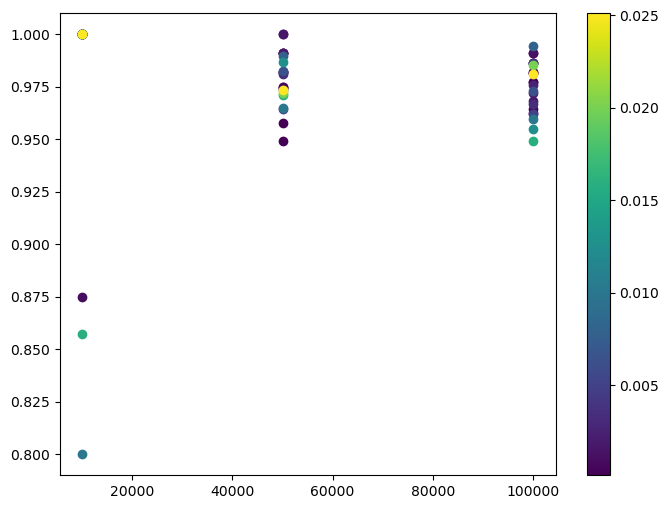

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

norm = plt.Normalize(min(metaluni), max(metaluni))

for mcl in Mcluni:
    for metal in metaluni:
        tmp = data.loc[(data['Mcl']==mcl)&(data['Z']==metal)]    

        color=cm.viridis(norm(metal))
        ax.scatter(mcl, sum(tmp['mergetype']=='ejected')/len(tmp), color=color)

fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'))


In [19]:
norm(tmp['Z'])

array([0.00012589, 0.00015849, 0.00019953, 0.00025119, 0.00031623,
       0.00039811, 0.00050119, 0.00063096, 0.00079433, 0.001     ,
       0.00125893, 0.00158489, 0.00199526, 0.00251189, 0.00316228,
       0.00398107, 0.00501187, 0.00630957, 0.00794328, 0.01      ,
       0.01258926, 0.01584893, 0.01995262, 0.02511887])